In [3]:
import tensorflow as tf


In [4]:
with tf.name_scope('Input'):
    x = tf.placeholder("float", [128, 100,100],name='Word_embedding')
with tf.name_scope('Output'):    
    target= tf.placeholder("float", [128, 128],name='Sentiment')


In [5]:
with tf.name_scope('LSTM1'):
    cell=tf.contrib.rnn.BasicLSTMCell(num_units=128,state_is_tuple=True,forget_bias=1.0)
    val1,state1=tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

In [6]:
with tf.name_scope('LSTM2'):
    cell=tf.contrib.rnn.GRUCell(num_units=128)
    val2,state2=tf.nn.dynamic_rnn(cell,val1,dtype=tf.float32)

In [7]:
with tf.name_scope('LSTM3'):
    cell=tf.contrib.rnn.BasicRNNCell(num_units=128)
    val3,state3=tf.nn.dynamic_rnn(cell,val2,dtype=tf.float32)

In [8]:
with tf.name_scope('Loss'):
    with tf.name_scope('Prediction'):
        pred=tf.nn.softmax(state3)
    with tf.name_scope('Loss'):
        cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=target))

        
    

In [9]:
with tf.name_scope('Training'):
    optimize=tf.train.AdamOptimizer(learning_rate= 0.01)
    minimize=optimize.minimize(cross_entropy)

In [10]:
sess=tf.Session()

In [11]:
# Set the logs writer to the folder /tmp/tensorflow_logs
summary_writer = tf.summary.FileWriter('/home/nancy/Desktop/logs',graph_def=sess.graph_def)

In [12]:
from IPython.display import Image


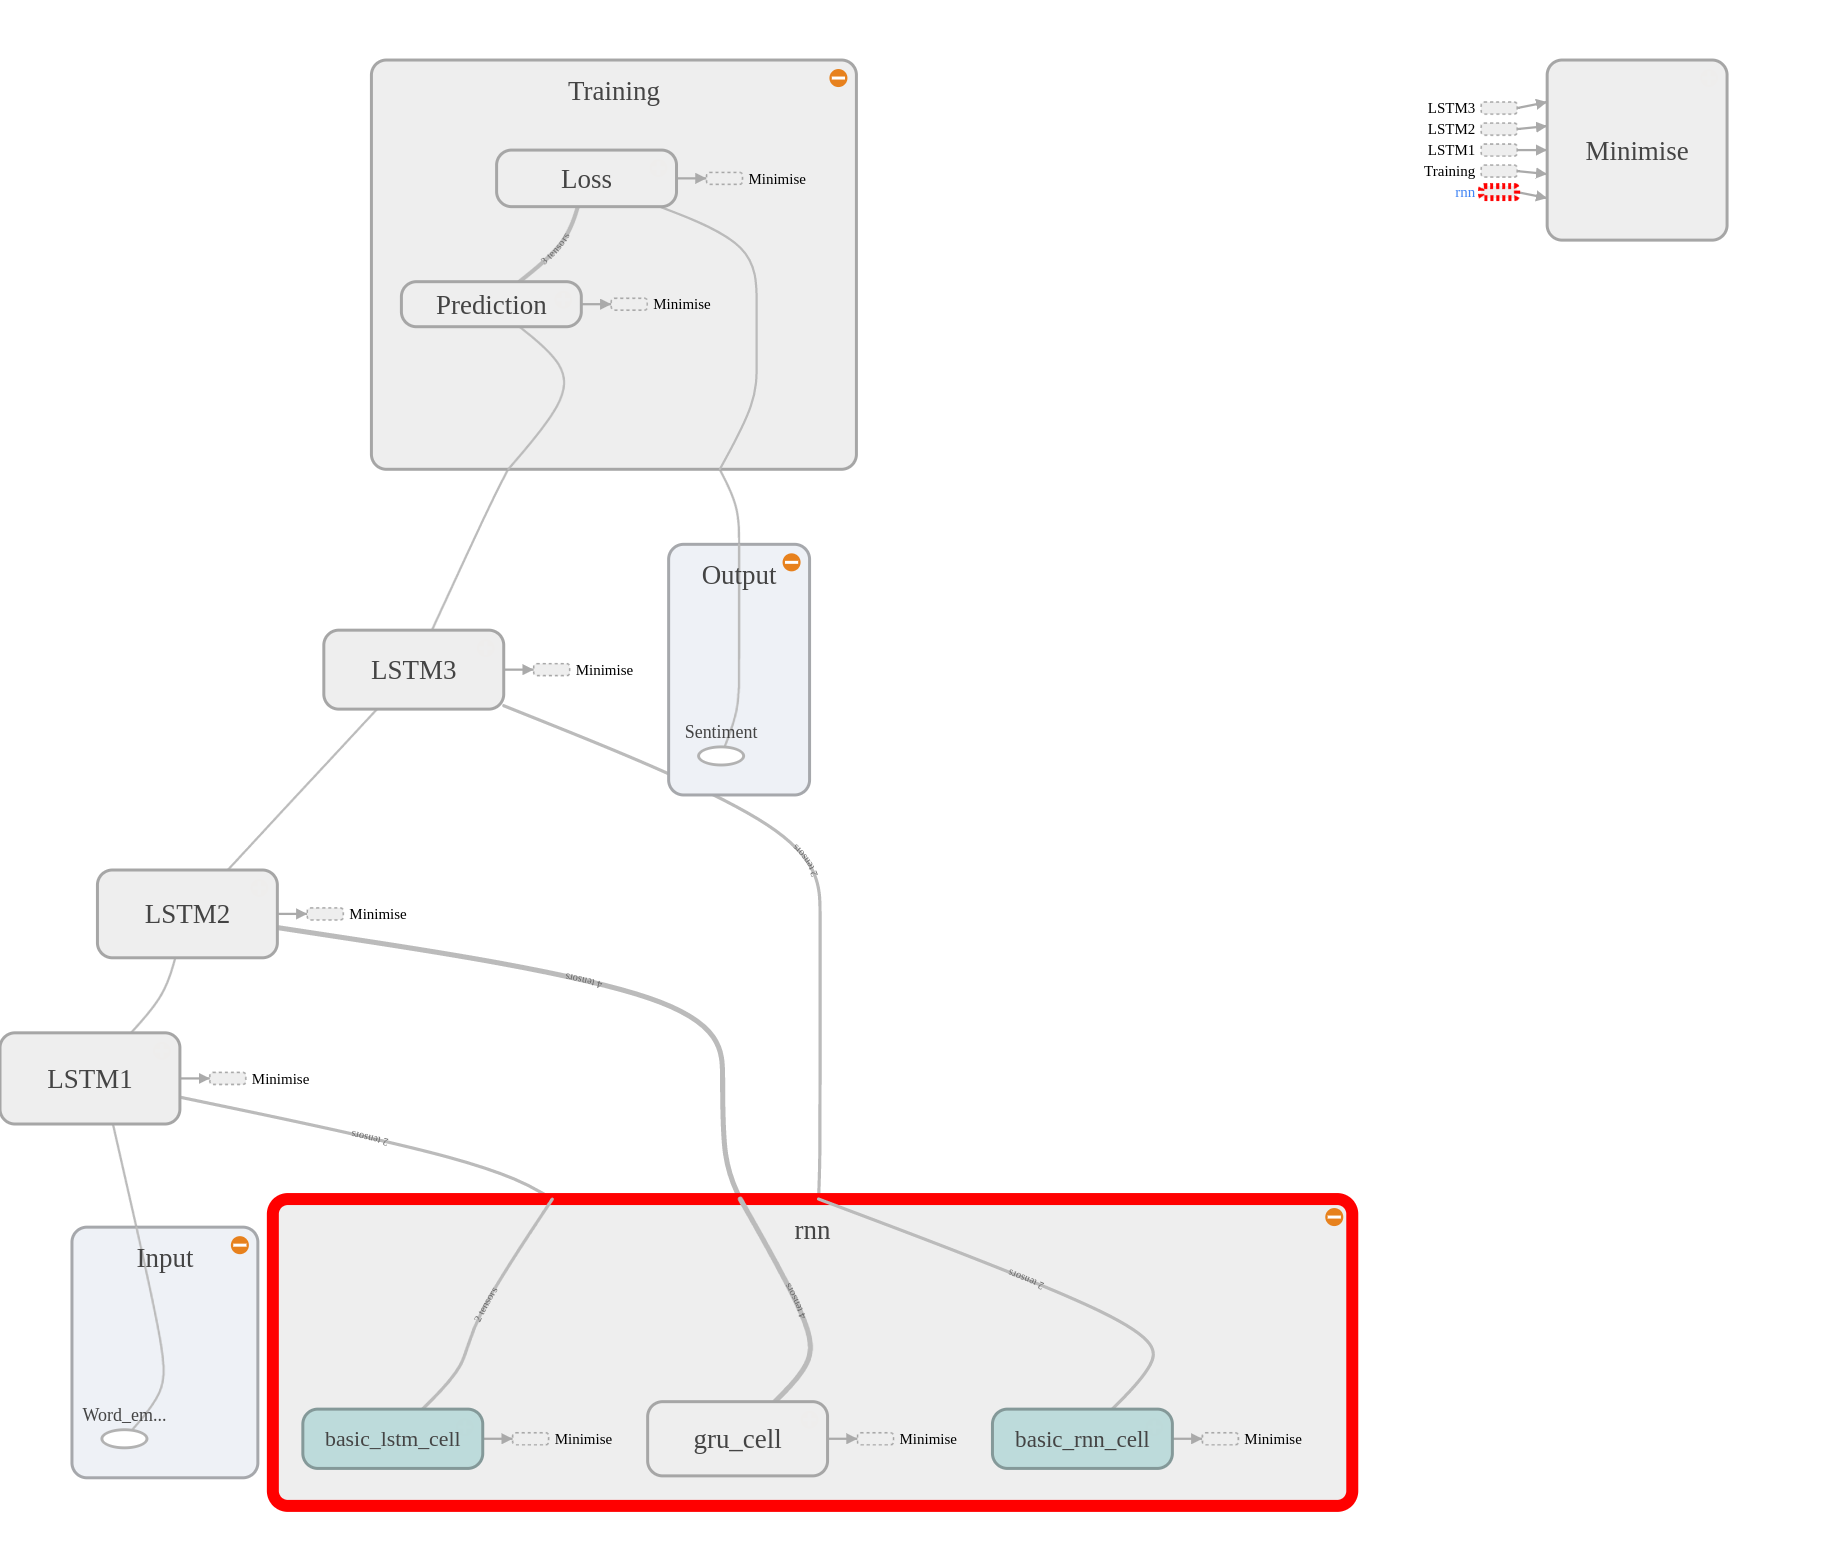

In [13]:
Image('/home/nancy/Downloads/graph-run= (3).png')